In [1]:
!ls data/M83_files

jw02219-o005_t006_miri_ch1-short_s3d.fits
jw02219-o005_t006_miri_ch2-short_s3d.fits
jw02219-o005_t006_miri_ch3-short_s3d.fits
jw02219-o005_t006_miri_ch4-short_s3d.fits
jw02219-o010_t006_miri_ch1-medium_s3d.fits
jw02219-o010_t006_miri_ch2-medium_s3d.fits
jw02219-o010_t006_miri_ch3-medium_s3d.fits
jw02219-o010_t006_miri_ch4-medium_s3d.fits
jw02219-o015_t006_miri_ch1-long_s3d.fits
jw02219-o015_t006_miri_ch2-long_s3d.fits
jw02219-o015_t006_miri_ch3-long_s3d.fits
jw02219-o015_t006_miri_ch4-long_s3d.fits


In [48]:
!du -h -a data/try_files

 96M	data/try_files/jw01717-o006_t010_miri_ch3-shortmediumlong_s3d.fits
 96M	data/try_files/jw02730-o004_t014_miri_ch3-shortmediumlong_s3d.fits
 80M	data/try_files/jw01717-o008_t004_miri_ch3-shortmediumlong_s3d.fits
 25M	data/try_files/jw02219-o005_t006_miri_ch3-short_s3d.fits
 80M	data/try_files/jw01717-o004_t008_miri_ch3-shortmediumlong_s3d.fits
 96M	data/try_files/jw01050-o008_t011_miri_ch3-shortmediumlong_s3d.fits
 22M	data/try_files/jw01335-o012_t006_miri_ch3-short_s3d.fits
 96M	data/try_files/jw02260-o005_t005_miri_ch3-shortmediumlong_s3d.fits
 17M	data/try_files/jw01261-o002_t004_miri_ch3-short_s3d.fits
 50M	data/try_files/jw01264-o014_t012_miri_ch3-shortmedium_s3d.fits
 59M	data/try_files/jw01523-o002_t003_miri_ch3-shortmediumlong_s3d.fits
 17M	data/try_files/jw01335-o010_t009_miri_ch3-short_s3d.fits
 96M	data/try_files/jw01050-o010_t011_miri_ch3-shortmediumlong_s3d.fits
 54M	data/try_files/jw01717-o010_t006_miri_ch3-shortmediumlong_s3d.fits
 31M	data/try_files/jw01023-o017_t00

In [2]:
from jdaviz import Cubeviz

In [41]:
cubeviz = Cubeviz()
cubeviz.load_data("data/try_files/jw02729-o004_t004_miri_ch3-shortmediumlong_s3d.fits")
cubeviz.show()

Application(config='cubeviz', docs_link='https://jdaviz.readthedocs.io/en/latest/cubeviz/index.html', events=[…

In [3]:
import os
from jdaviz import Cubeviz
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np

# Create a function to load and show a file in Cubeviz
def load_and_show(file_name):
    file_path = os.path.join(data_dir, file_name)
    global cubeviz
    cubeviz = Cubeviz()
    cubeviz.load_data(file_path)
    print(file_name)
    # dir_path = 'output/figure/try/' + file_name + '/'
    # if not os.path.exists(dir_path):
    #     os.makedirs(dir_path)
    cubeviz.show()

# Directory containing the files
data_dir = "data/M83_files"

ob_list = np.loadtxt('data/M83_filenames.txt', dtype = str)

# Get a list of files in the directory
file_list = np.array([f for f in os.listdir(data_dir) if f.endswith(".fits")])
file_list = file_list[np.isin(file_list, ob_list)]

# Create an interactive widget for selecting files
file_selector = widgets.Dropdown(
    options=file_list,
    description='Select a file:',
    disabled=False,
)

# Use the interact function to create the interactive interface
interact(load_and_show, file_name=file_selector)


interactive(children=(Dropdown(description='Select a file:', options=('jw02219-o005_t006_miri_ch4-short_s3d.fi…

<function __main__.load_and_show(file_name)>

In [16]:
from astropy import units as u
from specutils.manipulation import extract_region
import matplotlib.pyplot as plt

In [35]:
spectrum_total = cubeviz.app.get_data_from_viewer('spectrum-viewer', 'Subset 1')
spectrum_total

        Use viz_helper.get_data instead. [warnings]
        Use viz_helper.get_data instead.


<Spectrum1D(flux=<Quantity [20164.60390697, 20520.60961604, 20460.13381159, ...,
           90362.55361557, 89335.00901794, 92014.93245316] MJy / sr>, spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [11.55125019, 11.55375019, 11.55625019, ..., 17.97375005, 17.97625005,
   17.97875005] um>)>

In [30]:
regions = cubeviz.specviz.get_spectral_regions()

# extract the line regions
if regions and "Subset 2" in regions.keys():
    line_region = regions["Subset 2"]
else:
    print('Subset 2 not in regions')

# extract the continuum regions
if regions and "Subset 3" in regions.keys():
    continuum_region = regions["Subset 3"]
else:
    print('Subset 3 not in regions')

In [31]:
spec_line = extract_region(spectrum_total, line_region)
spec_continuum = extract_region(spectrum_total, continuum_region)

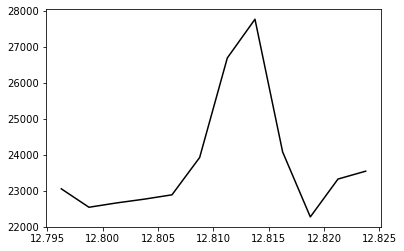

In [32]:
plt.figure()
plt.plot(spec_line.spectral_axis, spec_line.flux, color = 'k')

In [33]:
cont_psf_cube = cubeviz.app.get_data_from_viewer('uncert-viewer', 'LinFitCube')
np.shape(cont_psf_cube)

        Use viz_helper.get_data instead. [warnings]
        Use viz_helper.get_data instead.


(39, 43, 2572)